## Import functions

In [28]:
#standard modules
import os
import glob

#import mdanalyis modules and packages
import MDAnalysis as mda
from MDAnalysis.analysis import rms, align, distances

#matplotlib
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab
import matplotlib as mpl

#numpy
import numpy as np

#pandas
import pandas as pd

#nglview
import nglview

#seaborn
import seaborn as sns

#scipy
from scipy.stats import gaussian_kde

## Define Paths

In [29]:
project_path = '/Users/javingfun/Library/CloudStorage/OneDrive-UCSanDiego/UCSD_PhD/Projects/Mpro_MD_dry'

#apo path
apo_path = os.path.join(project_path,'mpro_apo')

apo_monomer_path = os.path.join(apo_path,'mpro_apo_monomer')
apo_dimer_path = os.path.join(apo_path,'mpro_apo_dimer')

#ens_path
ens_path = os.path.join(project_path,'mpro_ens')

ens_monomer_path = os.path.join(ens_path,'mpro_ens_monomer')
ens_dimer_path = os.path.join(ens_path,'mpro_ens_dimer')
ens_dimer_asym_path = os.path.join(ens_path,'mpro_ens_dimer_asym')

#nirm_path
nirm_path = os.path.join(project_path,'mpro_nirm')

nirm_monomer_path = os.path.join(nirm_path,'mpro_nirm_monomer')
nirm_dimer_path = os.path.join(nirm_path,'mpro_nirm_dimer')
nirm_dimer_asym_path = os.path.join(nirm_path,'mpro_nirm_dimer_asym')

#nat_path
nat_path = os.path.join(project_path,'mpro_nat')

nat_monomer_path = os.path.join(nat_path,'mpro_nat_monomer')
nat_dimer_path = os.path.join(nat_path,'mpro_nat_dimer')
nat_dimer_asym_path = os.path.join(nat_path,'mpro_nat_dimer_asym')

## Create universe

In [30]:
def make_universe(path,replica):
    
    #obtain trajectory and topology from file, create a universe
    if replica == 0:
        topology = glob.glob(os.path.join(path,'*.pdb'))
        u = mda.Universe(topology[0])
        
    
    else:
        topology = glob.glob(os.path.join(path,'*.prmtop'))
        trajectory = glob.glob(os.path.join(path, '*{rep}.nc'.format(rep=replica))) 
        u = mda.Universe(topology[0], trajectory[0])
        
    return u

## Load systems

In [31]:
#apo 
am_0 = make_universe(apo_monomer_path,0)
am_1 = make_universe(apo_monomer_path,1)
am_2 = make_universe(apo_monomer_path,2)
am_3 = make_universe(apo_monomer_path,3)

ad_0 = make_universe(apo_dimer_path,0)
ad_1 = make_universe(apo_dimer_path,1)
ad_2 = make_universe(apo_dimer_path,2)
ad_3 = make_universe(apo_dimer_path,3)

am_list = [am_1,am_2,am_3]
ad_list = [ad_1,ad_2,ad_3]

#ens 
em_0 = make_universe(ens_monomer_path,0)
em_1 = make_universe(ens_monomer_path,1)
em_2 = make_universe(ens_monomer_path,2)
em_3 = make_universe(ens_monomer_path,3)

ed_0 = make_universe(ens_dimer_path,0)
ed_1 = make_universe(ens_dimer_path,1)
ed_2 = make_universe(ens_dimer_path,2)
ed_3 = make_universe(ens_dimer_path,3)

ea_0 = make_universe(ens_dimer_asym_path,0)
ea_1 = make_universe(ens_dimer_asym_path,1)
ea_2 = make_universe(ens_dimer_asym_path,2)
ea_3 = make_universe(ens_dimer_asym_path,3)

em_list = [em_1,em_2,em_3]
ed_list = [ed_1,ed_2,ed_3]
ea_list = [ea_1,ea_2,ea_3]

#nirm monomer
nm_0 = make_universe(nirm_monomer_path,0)
nm_1 = make_universe(nirm_monomer_path,1)
nm_2 = make_universe(nirm_monomer_path,2)
nm_3 = make_universe(nirm_monomer_path,3)

nd_0 = make_universe(nirm_dimer_path,0)
nd_1 = make_universe(nirm_dimer_path,1)
nd_2 = make_universe(nirm_dimer_path,2)
nd_3 = make_universe(nirm_dimer_path,3)

na_0 = make_universe(nirm_dimer_asym_path,0)
na_1 = make_universe(nirm_dimer_asym_path,1)
na_2 = make_universe(nirm_dimer_asym_path,2)
na_3 = make_universe(nirm_dimer_asym_path,3)

nm_list = [nm_1,nm_2,nm_3]
nd_list = [nd_1,nd_2,nd_3]
na_list = [na_1,na_2,na_3]

#nat monomer
pm_0 = make_universe(nirm_monomer_path,0)
pm_1 = make_universe(nirm_monomer_path,1)
pm_2 = make_universe(nirm_monomer_path,2)
pm_3 = make_universe(nirm_monomer_path,3)

pd_0 = make_universe(nirm_dimer_path,0)
pd_1 = make_universe(nirm_dimer_path,1)
pd_2 = make_universe(nirm_dimer_path,2)
pd_3 = make_universe(nirm_dimer_path,3)

pa_0 = make_universe(nirm_dimer_asym_path,0)
pa_1 = make_universe(nirm_dimer_asym_path,1)
pa_2 = make_universe(nirm_dimer_asym_path,2)
pa_3 = make_universe(nirm_dimer_asym_path,3)

pm_list = [pm_1,pm_2,pm_3]
pd_list = [pd_1,pd_2,pd_3]
pa_list = [pa_1,pa_2,pa_3]

## Create selection regions and sites

In [32]:
selection_ranges = {'protomer':[1,306],
                    'nterm':[1,14],
                    'domain1':[8,101],
                    'lid':[40,55],
                    'domain2':[102,184],
                    'idl':[185,200],
                    'domain3':[201,303],
                    'cterm':[298,306],
                    'oxyloop':[131,146],
                   'oxyhole':[142,145],
                   'interface_1':[1,14],
                   'interface_2':[109,172],
                   'interface_3':[290,306]}

selection_sites = {'s1_pocket':[140,141,142,163,166,172],
             's1p_pocket':[24,25],
             's2_pocket':[41,49,54,165,187],
             's4_pocket':[165,167,192],
             'active_site':[41,145],
             'interface':[1,4,10,12,14,139,166,290,299]}

conserved_residues = []

## Define functions

In [33]:
#create string for selecting atoms. Region can be a range of residues or a specific site defined by different residues
def create_selection(selection,region,state):
    
    #Dictionary with selections
    selection_ranges = {'protomer':[1,306],
                    'nterm':[1,14],
                    'domain1':[8,101],
                    'lid':[40,55],
                    'domain2':[102,184],
                    'idl':[185,200],
                    'domain3':[201,303],
                    'cterm':[298,306],
                    'oxyloop':[131,146],
                   'oxyhole':[142,145],
                   'interface_1':[1,14],
                   'interface_2':[109,172],
                   'interface_3':[290,306]}

    selection_sites = {'s1_pocket':[140,141,142,163,166,172],
                 's1p_pocket':[24,25],
                 's2_pocket':[41,49,54,165,187],
                 's4_pocket':[165,167,192],
                 'active_site':[41,145],
                 'interface':[1,4,10,12,14,139,166,290,299]}
    
    #Function to convert from chain A to chain B
    def get_b(a):
        return a + 306
    
    #Function to make atom selection of alpha carbons from ranges
    def make_range_selection(start,stop):  
            return f"resid {start}-{stop} and name CA"
        
    #Make selection string from selection
    def make_site_selection(sites):
        selection_string = ''
        for site in sites:
            selection_string += str(site) + ' '

        return 'resid '+ selection_string + 'and name CA'
    
    #create atom selection syntax expression given a range or selection
    if region == 'range':
        
        #define selection in chain A
        range_a = selection_ranges[selection]
        sel_a = make_range_selection(range_a[0],range_a[1])

        #define selection in chain B
        range_b = []
        for sel in selection_ranges[selection]:
            range_b.append(get_b(sel))
        sel_b = make_range_selection(range_b[0],range_b[1])

    elif region == 'site':
        
        #define selection in chain A
        sel_a = make_site_selection(selection_sites[selection])

        #define selection in chain B
        range_b = []
        for sel in selection_sites[selection]:
            range_b.append(get_b(sel))
        sel_b = make_site_selection(range_b)
        
    if state == 'monomer':
        #returns expression for chain A
        return sel_a
    
    elif state == 'dimer':
        #returns expression for chain A and chain B
        return sel_b

In [34]:
def make_plot_rmsd(x,monomer,dimer_a,dimer_b,asym_a,asym_b,title):
    fig,ax = plt.subplots(sharex=True)
    ax.plot(x,monomer,color='black',label='apo_dimer_A')
    ax.plot(x,dimer_a,color='blue',label='dimer_A')
    ax.plot(x,dimer_b,color='purple',label='dimer_B')
    ax.plot(x,asym_a,color='red',label='asym_A')
    ax.plot(x,asym_b,color='orange',label='asym_B')
    ax.set_ylim(0,5)
    ax.legend()
    ax.set_title(title.upper())

In [35]:
def make_plot_rmsf(x,monomer,dimer_a,dimer_b,asym_a,asym_b,title):
    fig,ax = plt.subplots(sharex=True)
    ax.plot(x,monomer,color='black',label='apo_dimer_A')
    ax.plot(x,dimer_a,color='blue',label='dimer_A')
    ax.plot(x,dimer_b,color='purple',label='dimer_B')
    ax.plot(x,asym_a,color='red',label='asym_A')
    ax.plot(x,asym_b,color='orange',label='asym_B')
    ax.set_ylim(0,5)
    ax.legend()
    ax.set_title(title.upper())

In [36]:
def get_average(rmsd_dict):
    array1 = rmsd_dict[1][:,3]
    array2 = rmsd_dict[2][:,3]
    array3 = rmsd_dict[3][:,3]
    stacked_arrays = np.stack((array1, array2, array3), axis =-1)
    average = np.mean(stacked_arrays, axis=-1)
    return average

## RMSD

In [37]:
#Calculate rmsd for a given replica 
def calc_rmsd(rep,ref,sel):
    R = mda.analysis.rms.RMSD(rep,ref,select='backbone',groupselections=[sel])
    R.run(start=0,stop=1000)
    #with open('{}_rmsd_all.npy'.format(selection),'wb') as f:
        #np.save(f,R.rmsd)
    #print("Finished")
    return R.rmsd

In [38]:
def get_average(rmsd_dict):
        array1 = rmsd_dict[0][:,3]
        array2 = rmsd_dict[1][:,3]
        array3 = rmsd_dict[2][:,3]
        stacked_arrays = np.stack((array1, array2, array3), axis =-1)
        average = np.mean(stacked_arrays, axis=-1)
        return average

In [39]:
print(em_0)

<Universe with 51734 atoms>


0
1
2


(0.0, 15.0)

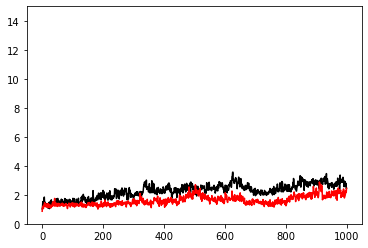

In [40]:
am_rmsd_dict = {}
em_rmsd_dict = {}
pm_rmsd_dict = {}
sel = 'oxyloop'

for x in range(0,3):
    print(x)
    am_rmsd_dict[x] = calc_rmsd(am_list[x],am_0,sel_range_dict[sel][0])
    em_rmsd_dict[x] = calc_rmsd(em_list[x],em_0,sel_range_dict[sel][0])
    #nm_rmsd_dict[x] = calc_rmsd(nm_list[x],nm_0,sel_range_dict[sel][0])
    
am_rmsd_mean = get_average(am_rmsd_dict)
em_rmsd_mean = get_average(em_rmsd_dict)
plt.plot(am_rmsd_mean,color='black')
plt.plot(em_rmsd_mean,color='red')
plt.ylim(0,15)

resid 1-306 and name CA


(0.0, 10.0)

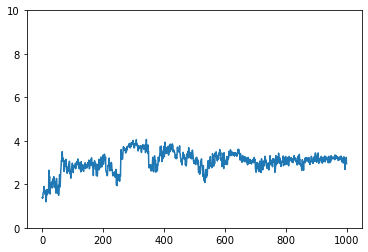

In [41]:
#Generate selection
sel = create_selection('protomer','range','monomer')
print(sel)

#Calculate RMSD for a given replica
rmsd_am_1 = calc_rmsd(am_1,am_0,sel)
plt.plot(rmsd_am_1[:,3])
plt.ylim(0,10)

In [42]:
#create dictionary with selection strings
sel_range_dict = {}
for sel in selection_ranges:
    sel_monomer = create_selection(sel,'range','monomer')
    sel_dimer = create_selection(sel,'range','dimer')
    sel_range_dict[sel] = [sel_monomer,sel_dimer]

In [43]:
sel_range_dict

{'protomer': ['resid 1-306 and name CA', 'resid 307-612 and name CA'],
 'nterm': ['resid 1-14 and name CA', 'resid 307-320 and name CA'],
 'domain1': ['resid 8-101 and name CA', 'resid 314-407 and name CA'],
 'lid': ['resid 40-55 and name CA', 'resid 346-361 and name CA'],
 'domain2': ['resid 102-184 and name CA', 'resid 408-490 and name CA'],
 'idl': ['resid 185-200 and name CA', 'resid 491-506 and name CA'],
 'domain3': ['resid 201-303 and name CA', 'resid 507-609 and name CA'],
 'cterm': ['resid 298-306 and name CA', 'resid 604-612 and name CA'],
 'oxyloop': ['resid 131-146 and name CA', 'resid 437-452 and name CA'],
 'oxyhole': ['resid 142-145 and name CA', 'resid 448-451 and name CA'],
 'interface_1': ['resid 1-14 and name CA', 'resid 307-320 and name CA'],
 'interface_2': ['resid 109-172 and name CA', 'resid 415-478 and name CA'],
 'interface_3': ['resid 290-306 and name CA', 'resid 596-612 and name CA']}

In [44]:
sel_site_dict = {}
for sel in selection_sites:
    sel_monomer = create_selection(sel,'site','monomer')
    sel_dimer = create_selection(sel,'site','dimer')
    sel_site_dict[sel] = [sel_monomer,sel_dimer]

In [45]:
sel_site_dict

{'s1_pocket': ['resid 140 141 142 163 166 172 and name CA',
  'resid 446 447 448 469 472 478 and name CA'],
 's1p_pocket': ['resid 24 25 and name CA', 'resid 330 331 and name CA'],
 's2_pocket': ['resid 41 49 54 165 187 and name CA',
  'resid 347 355 360 471 493 and name CA'],
 's4_pocket': ['resid 165 167 192 and name CA',
  'resid 471 473 498 and name CA'],
 'active_site': ['resid 41 145 and name CA', 'resid 347 451 and name CA'],
 'interface': ['resid 1 4 10 12 14 139 166 290 299 and name CA',
  'resid 307 310 316 318 320 445 472 596 605 and name CA']}

In [46]:
#Calcualte RMSD by iterating over replica
for am_rep in am_list:
    am_rmsd = calc_rmsd(am_rep,am_0,sel)
    plt.plot(am_rmsd[:,3])
    plt.ylim(0,10)

SelectionError: Unknown selection token: 'interface'

In [ ]:
#Return numpy array with RMSD values for each chain in a monomer/dimer
#numpy array should contain rmsd for each of the replicates in a chain
#if monomer, return 1 array
#if dimer, return 2 arrays
def get_rmsd(reps,ref,sel,region,state):
    
    #Calculate rmsd for a given replica 
    def calc_rmsd(rep,ref,sel,region,state):
        R = mda.analysis.rms.RMSD(rep,ref,select='backbone',groupselections=[sel])
        R.run(start=0,stop=1000)
        #with open('{}_rmsd_all.npy'.format(selection),'wb') as f:
            #np.save(f,R.rmsd)
        #print("Finished")
        return R.rmsd
    
    if state == 'monomer':
        sel_a = create_selection(sel,region,state)
        rmsd_a = {}

        for rep in reps:
            rmsd_a[rep] = calc_rmsd(rep,ref,sel,region,state)

        return rmsd_a

    elif state == 'dimer':
        sel_a, sel_b = create_selection(sel,region,state)
        rmsd_a = {}
        rmsd_b = {}

        for rep in reps:
            rmsd_a[rep] = calc_rmsd(sel,region,'monomer')
            rmsd_b[rep] = calc_rmsd(sel,region,'dimer')


    return rmsd_a,rmsd_b

In [ ]:
def get_rmsd_triplicate(reps,ref,selection,region,state):
    
    #calculate rmsd of selection
    def calc_rmsd(rep,ref,sel):
        R = mda.analysis.rms.RMSD(rep,ref,select='backbone',groupselections=[sel])
        R.run(start=0,stop=1000)
        #with open('{}_rmsd_all.npy'.format(selection),'wb') as f:
            #np.save(f,R.rmsd)
        #print("Finished")
        return R.rmsd
    
    #incorporate logic given a state (monomer/dimer)
    if state == 'monomer':
        sel_a = create_selection(selection,region,state)
        sels = {'a':sel_a}
        rmsd_a = {}
        
        for key,item in sels.items():
            count = 1
            if key == 'a':
                for rep in reps:
                    rmsd_a[count] = calc_rmsd(rep,ref,item)
                    count += 1

            elif key == 'b':
                for rep in reps:
                    rmsd_b[count] = calc_rmsd(rep,ref,item)
                    count += 1
            else:
                pass
        
        
        
        return rmsd_a
        
    elif state == 'dimer':
        sel_a, sel_b = create_selection(selection,region,state)
        sels = {'a':sel_a,'b':sel_b}
        rmsd_a = {}
        rmsd_b = {}
        
        for key,item in sels.items():
            count = 1
            if key == 'a':
                for rep in reps:
                    rmsd_a[count] = calc_rmsd(rep,ref,item)
                    count += 1

            elif key == 'b':
                for rep in reps:
                    rmsd_b[count] = calc_rmsd(rep,ref,item)
                    count += 1
            else:
                pass
        
        return rmsd_a,rmsd_b

In [ ]:
def get_rmsd_mean(reps,ref,selection,region,state):
    
    #calculate rmsd of selection
    def calc_rmsd(rep,ref,sel):
        R = mda.analysis.rms.RMSD(rep,ref,select='backbone',groupselections=[sel])
        R.run(start=0,stop=1000)
        #with open('{}_rmsd_all.npy'.format(selection),'wb') as f:
            #np.save(f,R.rmsd)
        #print("Finished")
        return R.rmsd
    
    #calculate average for all rmsd's
    def get_average(rmsd_dict):
        array1 = rmsd_dict[1][:,3]
        array2 = rmsd_dict[2][:,3]
        array3 = rmsd_dict[3][:,3]
        stacked_arrays = np.stack((array1, array2, array3), axis =-1)
        average = np.mean(stacked_arrays, axis=-1)
        return average
    
    #incorporate logic given a state (monomer/dimer)
    if state == 'monomer':
        sel_a = create_selection(selection,region,state)
        sels = {'a':sel_a}
        rmsd_a = {}
        
        for key,item in sels.items():
            count = 1
            if key == 'a':
                for rep in reps:
                    rmsd_a[count] = calc_rmsd(rep,ref,item)
                    count += 1

            elif key == 'b':
                for rep in reps:
                    rmsd_b[count] = calc_rmsd(rep,ref,item)
                    count += 1
            else:
                pass
        
        mean_a = get_average(rmsd_a)
        
        return mean_a
        
    elif state == 'dimer':
        sel_a, sel_b = create_selection(selection,region,state)
        sels = {'a':sel_a,'b':sel_b}
        rmsd_a = {}
        rmsd_b = {}
        
        for key,item in sels.items():
            count = 1
            if key == 'a':
                for rep in reps:
                    rmsd_a[count] = calc_rmsd(rep,ref,item)
                    count += 1

            elif key == 'b':
                for rep in reps:
                    rmsd_b[count] = calc_rmsd(rep,ref,item)
                    count += 1
            else:
                pass
        
        mean_a = get_average(rmsd_a)
        mean_b = get_average(rmsd_b)
        
        return mean_a,mean_b

In [ ]:
apo_dimer = [ad_1,ad_2,ad_3]
apo_dimer_rmsd = get_rmsd_mean(apo_dimer,ad_0,'protomer','range','monomer')

In [ ]:
ens_dimer = [ed_1,ed_2,ed_3]
ens_dimer_a_rmsd, ens_dimer_b_rmsd = get_rmsd_mean(ens_dimer,ed_0,'protomer','range','dimer')

ens_dimer_asym = [ea_1,ea_2,ea_3]
ens_dimer_asym_a_rmsd, ens_dimer_asym_b_rmsd = get_rmsd_mean(ens_dimer_asym,ea_0,'protomer','range','dimer')

In [ ]:
make_plot_rmsd(range(1000),
          apo_dimer_rmsd,
          ens_dimer_a_rmsd, 
          ens_dimer_b_rmsd,
          ens_dimer_asym_a_rmsd,
          ens_dimer_asym_b_rmsd,
         'Ensitrelvir Average RMSD per Protomer')

In [ ]:
apo_dimer = [ad_1,ad_2,ad_3]
apo_dimer_rmsd = get_rmsd_mean(apo_dimer,ad_0,'protomer','range','monomer')

nirm_dimer = [nd_1,nd_2,nd_3]
nirm_dimer_a_rmsd, nirm_dimer_b_rmsd = get_rmsd_mean(nirm_dimer,nd_0,'protomer','range','dimer')

nirm_dimer_asym = [na_1,na_2,na_3]
nirm_dimer_asym_a_rmsd, nirm_dimer_asym_b_rmsd = get_rmsd_mean(nirm_dimer_asym,na_0,'protomer','range','dimer')

In [ ]:
make_plot_rmsd(range(1000),
          apo_dimer_rmsd,
          nirm_dimer_a_rmsd, 
          nirm_dimer_b_rmsd,
          nirm_dimer_asym_b_rmsd,
          nirm_dimer_asym_a_rmsd,
         'Nirmatrelvir Average RMSD per Protomer')

In [ ]:
for selection in selection_ranges:
    print(selection)

In [ ]:
selection = 'protomer'
mean_rmsd_a, mean_rmsd_b = get_rmsd_triplicate(apo_dimer,ad_0,selection,'range','dimer')


In [ ]:
len(mean_rmsd_a[])

## RMSF

In [ ]:
def get_rmsf_triplicate(reps,ref,selection,region,state):
    
    
    #calculate rmsf from reference
    def calc_rmsf(rep,ref,sel):
        
        #generate average structure to use as reference
        average = align.AverageStructure(rep,ref,
                                         select='backbone and name CA',
                                         ref_frame=0).run()

        #align trajectory to reference
        aligner = align.AlignTraj(rep,ref,
                                  select='backbone and name CA',
                                  in_memory=True).run()

        #calculate RMSF
        c_alphas = rep.select_atoms(sel)
        R = rms.RMSF(c_alphas).run()

        return(c_alphas.resids,R.results.rmsf)
    
    #create atom selection syntax expression given a range or selection
    if region == 'range':
        
        #define selection in chain A
        range_a = selection_ranges[selection]
        sel_a = make_range_selection(range_a[0],range_a[1])

        #define selection in chain B
        range_b = []
        for sel in selection_ranges[selection]:
            range_b.append(get_b(sel))
        sel_b = make_range_selection(range_b[0],range_b[1])

    elif region == 'site':
        
        #define selection in chain A
        sel_a = make_site_selection(selection_sites[selection])

        #define selection in chain B
        range_b = []
        for sel in selection_sites[selection]:
            range_b.append(get_b(sel))
        sel_b = make_site_selection(range_b)    

    #incorporate logic given a state (monomer/dimer)
    if state == 'monomer':
        sel_a = create_selection(selection,region,state)
        sels = {'a':sel_a}
        rmsf_a = {}
        
        for key,item in sels.items():
            count = 1
            if key == 'a':
                for rep in reps:
                    rmsf_a[count] = calc_rmsf(rep,ref,item)
                    count += 1

            elif key == 'b':
                for rep in reps:
                    rmsf_b[count] = calc_rmsf(rep,ref,item)
                    count += 1
            else:
                pass
        
        return rmsf_a
        
    elif state == 'dimer':
        sel_a, sel_b = create_selection(selection,region,state)
        sels = {'a':sel_a,'b':sel_b}
        rmsf_a = {}
        rmsf_b = {}
        
        for key,item in sels.items():
            count = 1
            if key == 'a':
                for rep in reps:
                    rmsf_a[count] = calc_rmsf(rep,ref,item)
                    count += 1

            elif key == 'b':
                for rep in reps:
                    rmsf_b[count] = calc_rmsf(rep,ref,item)
                    count += 1
            else:
                pass
        
        return rmsf_a,rmsf_b

In [ ]:
def get_rmsf_mean(reps,ref,selection,region,state):
    
    
    #calculate rmsf from reference
    def calc_rmsf(rep,ref,sel):
        
        #generate average structure to use as reference
        average = align.AverageStructure(rep,ref,
                                         select='backbone and name CA',
                                         ref_frame=0).run()

        #align trajectory to reference
        aligner = align.AlignTraj(rep,ref,
                                  select='backbone and name CA',
                                  in_memory=True).run()

        #calculate RMSF
        c_alphas = rep.select_atoms(sel)
        R = rms.RMSF(c_alphas).run()

        return(c_alphas.resids,R.results.rmsf)
    
    #return average rmsf as a np array
    def get_average(rmsf_dict):
        array1 = rmsf_dict[1][1]
        array2 = rmsf_dict[2][1]
        array3 = rmsf_dict[3][1]
        stacked_arrays = np.stack((array1, array2, array3), axis =-1)
        average = np.mean(stacked_arrays, axis=-1)
    
        return average
    
    #create atom selection syntax expression given a range or selection
    if region == 'range':
        
        #define selection in chain A
        range_a = selection_ranges[selection]
        sel_a = make_range_selection(range_a[0],range_a[1])

        #define selection in chain B
        range_b = []
        for sel in selection_ranges[selection]:
            range_b.append(get_b(sel))
        sel_b = make_range_selection(range_b[0],range_b[1])

    elif region == 'site':
        
        #define selection in chain A
        sel_a = make_site_selection(selection_sites[selection])

        #define selection in chain B
        range_b = []
        for sel in selection_sites[selection]:
            range_b.append(get_b(sel))
        sel_b = make_site_selection(range_b)    

    #incorporate logic given a state (monomer/dimer)
    if state == 'monomer':
        sel_a = create_selection(selection,region,state)
        sels = {'a':sel_a}
        rmsf_a = {}
        
        for key,item in sels.items():
            count = 1
            if key == 'a':
                for rep in reps:
                    rmsf_a[count] = calc_rmsf(rep,ref,item)
                    count += 1

            elif key == 'b':
                for rep in reps:
                    rmsf_b[count] = calc_rmsf(rep,ref,item)
                    count += 1
            else:
                pass
        
        mean_a = get_average(rmsf_a)
        
        return mean_a
        
    elif state == 'dimer':
        sel_a, sel_b = create_selection(selection,region,state)
        sels = {'a':sel_a,'b':sel_b}
        rmsf_a = {}
        rmsf_b = {}
        
        for key,item in sels.items():
            count = 1
            if key == 'a':
                for rep in reps:
                    rmsf_a[count] = calc_rmsf(rep,ref,item)
                    count += 1

            elif key == 'b':
                for rep in reps:
                    rmsf_b[count] = calc_rmsf(rep,ref,item)
                    count += 1
            else:
                pass
        
        mean_a = get_average(rmsf_a)
        mean_b = get_average(rmsf_b)
        
        return mean_a,mean_b

In [ ]:
ad_rmsf_a = get_rmsf_mean(apo_dimer,ad_0,'protomer','range','monomer')
ed_rmsf_a,ed_rmsf_b = get_rmsf_mean(ens_dimer,ed_0,'protomer','range','dimer')
ea_rmsf_a,ea_rmsf_b = get_rmsf_mean(ens_dimer_asym,ea_0,'protomer','range','dimer')


In [ ]:
make_plot_rmsf(range(len(ad_rmsf_a)),
              ad_rmsf_a,
              ed_rmsf_a,ed_rmsf_b,
              ea_rmsf_a,ea_rmsf_b,
              'Ensitrelvir RMSF by protomer')

In [ ]:
ad_rmsf_a = get_rmsf_mean(apo_dimer,ad_0,'protomer','range','monomer')
nd_rmsf_a,nd_rmsf_b = get_rmsf_mean(nirm_dimer,nd_0,'protomer','range','dimer')
na_rmsf_a,na_rmsf_b = get_rmsf_mean(nirm_dimer_asym,na_0,'protomer','range','dimer')


In [ ]:
make_plot_rmsf(range(len(nd_rmsf_a)),
              ad_rmsf_a,
              nd_rmsf_a,nd_rmsf_b,
              na_rmsf_b,na_rmsf_a,
              'Nirmatrelvir RMSF by protomer')

In [ ]:
#output distances as dictionary to be used here as input
def get_distribution(distance_a,distance_b):
    
    #create kdes from distances (kernel density estimation)
    density_a = gaussian_kde(distances_a)
    density_b = gaussian_kde(distances_b)
    
    #calculate covariance
    xs = np.linspace(0,32,200)
    density_a.covariance_factor = lambda: 0.25
    density_b._compute_covariance()
    
    #plot distribution lines
    ax.plot(xs, density_a(xs), label='a', linewidth=2.5, alpha=0.9, color='blue')
    ax.plot(xs, density_b(xs), label='b', linewidth=2.5, alpha=0.9, color='green')
    plt.title('title', fontsize=18)
    
    #fill area under curve
    